<a href="https://colab.research.google.com/github/nkharlamova/ML/blob/main/HW_4_pandas_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK: Analyze the dataset. Create at least 10 images, graphs or charts. Provide a brief conclusion for each image.**

In [ ]:
# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt
# We will use the Seaborn library
import seaborn as sns

sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
player_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/player_data.csv')
players = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Players.csv')
seasons_stats = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Seasons_Stats.csv')

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

**Let's consider the first dataset.**

**Loading the first 5 rows of the table for a preliminary data inspection and observing 8 columns with player information.**

In [ ]:
# розглянемо перший датасет
# загружаємо перші 5 рядків таблиці для попереднього перегляду данних;
# бачимо 8 колонок з інформацією по гравцям

player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.00,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.00,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.00,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.00,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.00,"November 3, 1974",San Jose State University



**Let's take a look at the list of columns and the data they contain. Firstly, it's worth noting that 5 out of 8 columns are in the 'object' format, which could complicate further work with this data. Secondly, we see that the column 'college' has the highest number of missing values.**

In [ ]:
# дивимося перелік колонок та які дані вони містять:
# перше, на що звертаємо увагу, 5 із 8 колонок в форматі object, який може ускладнити нам подальшу роботу з цими данними
# друге, ми бачимо, що пропущених значень найбільше всього в колонці college

player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


**Next, we can look at a more detailed description of the data. For example, there are a total of 4550 records, but only 4500 unique names ('name'). This means there are players with identical names, so to perform a deeper analysis, we need to find another parameter to ensure uniqueness for each player. Additionally, we encounter complications with the 'object' data type; for instance, in the column representing a player's height, we cannot calculate the mean, minimum, or maximum values, nor can we use these data directly for analyzing the impact of height on performance metrics. Therefore, we need to find a way to convert the data in the height column to the 'float64' format. Since we have complete data for the starting year ('year_start') and ending year ('year_end') of careers, we can add a new feature — career duration.**

In [ ]:
# Далі можна подивитися більш детальний опис данних: наприклад те, що всього записів 4550, але унікальних імен (name) 4500,
# тобто серед гравців є люди з ідентичним ім'ям, а значить для більш глибокого аналізу потрібно знайти ще якийсь параметр,
# щоб можна було отримати унікальність для кожного гравця.
# Також ми бачимо ускладнення з типом object: наприклад, колонка зросту (height) баскетболіста - ми не можемо подивитися середнє, мінімальне
# та максимальне значення, а також використати ці дані в такому вигляді для аналізу впиву зросту на якість показники.
# Тому потрібно шукати спосіб зробити дані в колонці у форматі float64.
# Так як в нас є повністю заповнені дані про роки початку (year_start) та кінця кар'єри (year_end), можна додати нову фічу - це тривалість кар'єри.

player_data.describe(include="all")

,name,year_start,year_end,position,height,weight,birth_date,college
count,4550,"4,550.00","4,550.00",4549,4549,"4,544.00",4519,4248
unique,4500,NaN,NaN,7,28,NaN,4161,473
top,George Johnson,NaN,NaN,G,6-7,NaN,"October 25, 1948",University of Kentucky
freq,3,NaN,NaN,1574,473,NaN,3,99
mean,NaN,"1,985.08","1,989.27",NaN,NaN,208.91,NaN,NaN
std,NaN,20.97,21.87,NaN,NaN,26.27,NaN,NaN
min,NaN,"1,947.00","1,947.00",NaN,NaN,114.00,NaN,NaN
25%,NaN,"1,969.00","1,973.00",NaN,NaN,190.00,NaN,NaN
50%,NaN,"1,986.00","1,992.00",NaN,NaN,210.00,NaN,NaN
75%,NaN,"2,003.00","2,009.00",NaN,NaN,225.00,NaN,NaN


**Creating a new feature called "career".**

In [ ]:
# створюємо нову фічу career

player_data.insert(1, "career", player_data["year_end"] - player_data["year_start"])


**Let's verify that we have successfully created it.**

In [ ]:
# перевіримо, що в нас вийшло

player_data.head()

,name,career,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,4,1991,1995,F-C,6-10,240.00,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,9,1969,1978,C-F,6-9,235.00,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,19,1970,1989,C,7-2,225.00,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,10,1991,2001,G,6-1,162.00,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,5,1998,2003,F,6-6,223.00,"November 3, 1974",San Jose State University


**Let's take a look at the total career duration of basketball players over the years. We see that more than 1200 individuals had careers of less than a year, and very few players reached a tenure of more than 10 years.**

<Axes: xlabel='career', ylabel='count'>

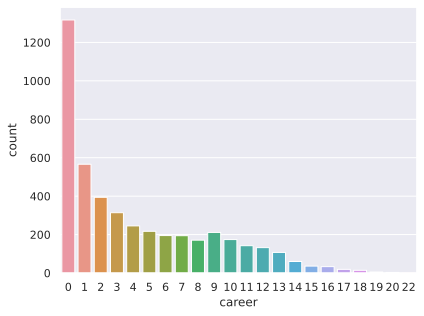

In [ ]:
# подивимось на загальну тривалість кар'єри баскетболістів по рокам
# бачимо, що більше ніж 1200 людей мали кар'єру менше року, і дуже невелика кількість гравців досягла стажу більше 10 років

sns.countplot(data=player_data, x="career")

**Let's see which positions are most prevalent. We can observe that the most popular position is guard (G), followed by forward (F) in second place, and with a significant margin, center (C) in third place.**

<Axes: xlabel='position', ylabel='count'>

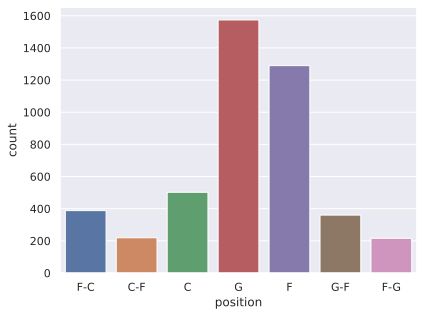

In [ ]:
# подивимось які позиції займають найбільше.
# бачимо, що найпопулярніша позиція захисника (G), на другому місці форвард (F),
# і на третьому місці з достатньо великим відривом - центровий (C).

sns.countplot(data=player_data, x="position")

**Let's see how long players' careers last by position.**

**We can observe many outliers among forwards: a small number of players have careers lasting more than 13 years, and their career duration is the shortest among all positions, averaging 1 year. Perhaps this is related to the complexity of tasks that forwards perform, where only the strongest players have long careers (as indicated by the highest number of outliers on the graph).**







<Axes: xlabel='position', ylabel='career'>

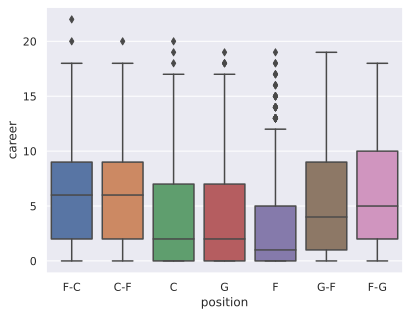

In [ ]:
# подивимось скільки триває кар'єра гравців по позиціях

# бачимо багато аутлеєрів у форвардів: невелика кількість людей з тривалістю кар'єри більше 13 років
# і в них же тривалість кар'єри найменша серед усіх позицій, в середньому 1 рік. Можливо це пов'язано зі складністю задач, які форвард виконує,
# що тільки найсильніші гравці мають тривалу кар'єру (про що може свідчити найбільша кількість аутлеєрів на графіку).

sns.boxplot(data=player_data, y="career", x="position")

**Let's consider the second dataset. Here we see 8 columns with personal data of players.**

In [ ]:
# розглянемо другий датасет
# тут ми бачимо 8 колонок з особистими данними гравців;

players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.00,77.00,Indiana University,"1,918.00",NaN,NaN
1,1,Cliff Barker,188.00,83.00,University of Kentucky,"1,921.00",Yorktown,Indiana
2,2,Leo Barnhorst,193.00,86.00,University of Notre Dame,"1,924.00",NaN,NaN
3,3,Ed Bartels,196.00,88.00,North Carolina State University,"1,925.00",NaN,NaN
4,4,Ralph Beard,178.00,79.00,University of Kentucky,"1,927.00",Hardinsburg,Kentucky



**In this dataset, the height values appear numerical, so the next step is to verify this. We see that they are indeed numerical, which means we can work with them. Again, we observe a similar pattern with missing data in the 'college' column. Additionally, there are many missing values in columns that denote the player's birthplace ('birth_city' and 'birth_state').**

In [ ]:
# в цьому датасеті показники зросту (height) виглядають числовими, тож наступним кроком перевіримо це.
# бачимо, що так і є, а значить можна працювати з ними
# знову бачимо схожу картину з пропущеними данними по колонці коледж (collage),
# також відсутньо багато значень у колонках, що визначають місце народження гравця (birth_city та birth_state)

players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3922 entries, 0 to 3921
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3922 non-null   int64  
 1   Player       3921 non-null   object 
 2   height       3921 non-null   float64
 3   weight       3921 non-null   float64
 4   collage      3573 non-null   object 
 5   born         3921 non-null   float64
 6   birth_city   3452 non-null   object 
 7   birth_state  3439 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 245.2+ KB


**With this description, we can now closely examine the height and weight metrics.**

In [ ]:
# при такому розгляді бачимо, що тепер можемо детально розглянути показники зросту і ваги

players.describe(include="all")

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
count,"3,922.00",3921,"3,921.00","3,921.00",3573,"3,921.00",3452,3439
unique,NaN,3921,NaN,NaN,422,NaN,1264,128
top,NaN,Curly Armstrong,NaN,NaN,University of Kentucky,NaN,Chicago,California
freq,NaN,1,NaN,NaN,89,NaN,114,344
mean,"1,960.50",NaN,198.70,94.78,NaN,"1,962.38",NaN,NaN
std,"1,132.33",NaN,9.27,12.04,NaN,20.33,NaN,NaN
min,0.00,NaN,160.00,60.00,NaN,"1,913.00",NaN,NaN
25%,980.25,NaN,190.00,86.00,NaN,"1,948.00",NaN,NaN
50%,"1,960.50",NaN,198.00,95.00,NaN,"1,964.00",NaN,NaN
75%,"2,940.75",NaN,206.00,102.00,NaN,"1,979.00",NaN,NaN


**Let's merge the dataset with the previous one to enhance our analysis capabilities.**

In [ ]:
# об'єднаємо датасет з попереднім, щоб розширити можливості для аналізу

data_merged = pd.merge(
    player_data, players,
    left_on="name",
    right_on="Player"
)

**Let's see what we have achieved.**

In [ ]:
# подивимося, що вийшло

data_merged.head()

,name,career,year_start,year_end,position,height_x,weight_x,birth_date,college,Unnamed: 0,Player,height_y,weight_y,collage,born,birth_city,birth_state
0,Alaa Abdelnaby,4,1991,1995,F-C,6-10,240.00,"June 24, 1968",Duke University,2047,Alaa Abdelnaby,208.00,108.00,Duke University,"1,968.00",Cairo,Egypt
1,Zaid Abdul-Aziz,9,1969,1978,C-F,6-9,235.00,"April 7, 1946",Iowa State University,746,Zaid Abdul-Aziz,206.00,106.00,Iowa State University,"1,946.00",Brooklyn,New York
2,Mahmoud Abdul-Rauf,10,1991,2001,G,6-1,162.00,"March 9, 1969",Louisiana State University,2048,Mahmoud Abdul-Rauf,188.00,83.00,"University of California, Los Angeles","1,942.00",Wilmington,Delaware
3,Tariq Abdul-Wahad,5,1998,2003,F,6-6,223.00,"November 3, 1974",San Jose State University,2518,Tariq Abdul-Wahad,198.00,101.00,San Jose State University,"1,974.00",Maisons Alfort,France
4,Shareef Abdur-Rahim,11,1997,2008,F,6-9,225.00,"December 11, 1976",University of California,2449,Shareef Abdur-Rahim,206.00,102.00,University of California,"1,976.00",Marietta,Georgia



**Let's examine in more detail. Now we have 17 columns, out of which 5 have duplicated or unnecessary data. For example, columns 'college' and 'collаge' contain the same information, but one has more missing data, so we will remove it.**

In [ ]:
# розглянемо детальніше
# тепер в нас 17 колонок, 5 із яких мають задубльовані або непотрібні більше дані,
# наприклад колонки college та collаge містять однакову інформацію, але одна з них має більше пропущених данних, її і видалимо

data_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3814 entries, 0 to 3813
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         3814 non-null   object 
 1   career       3814 non-null   int64  
 2   year_start   3814 non-null   int64  
 3   year_end     3814 non-null   int64  
 4   position     3813 non-null   object 
 5   height_x     3813 non-null   object 
 6   weight_x     3810 non-null   float64
 7   birth_date   3808 non-null   object 
 8   college      3547 non-null   object 
 9   Unnamed: 0   3814 non-null   int64  
 10  Player       3814 non-null   object 
 11  height_y     3814 non-null   float64
 12  weight_y     3814 non-null   float64
 13  collage      3497 non-null   object 
 14  born         3814 non-null   float64
 15  birth_city   3367 non-null   object 
 16  birth_state  3353 non-null   object 
dtypes: float64(4), int64(4), object(9)
memory usage: 536.3+ KB



**Deleting unnecessary columns.**

In [ ]:
# видаляємо непотрібні колонки

data_merged = data_merged.drop(["collage", "Unnamed: 0", "height_x", "weight_x", "Player"], axis=1)

**Let's see what we have got.**

In [ ]:
# ще раз дивимося, що в нас вийшло

data_merged.head()

,name,career,year_start,year_end,position,birth_date,college,height_y,weight_y,born,birth_city,birth_state
0,Alaa Abdelnaby,4,1991,1995,F-C,"June 24, 1968",Duke University,208.00,108.00,"1,968.00",Cairo,Egypt
1,Zaid Abdul-Aziz,9,1969,1978,C-F,"April 7, 1946",Iowa State University,206.00,106.00,"1,946.00",Brooklyn,New York
2,Mahmoud Abdul-Rauf,10,1991,2001,G,"March 9, 1969",Louisiana State University,188.00,83.00,"1,942.00",Wilmington,Delaware
3,Tariq Abdul-Wahad,5,1998,2003,F,"November 3, 1974",San Jose State University,198.00,101.00,"1,974.00",Maisons Alfort,France
4,Shareef Abdur-Rahim,11,1997,2008,F,"December 11, 1976",University of California,206.00,102.00,"1,976.00",Marietta,Georgia


**Now we can look at the distribution plots of players' height and weight. We see that the overall distribution is close to normal, indicating that athletes are selected according to specific requirements for each position.**

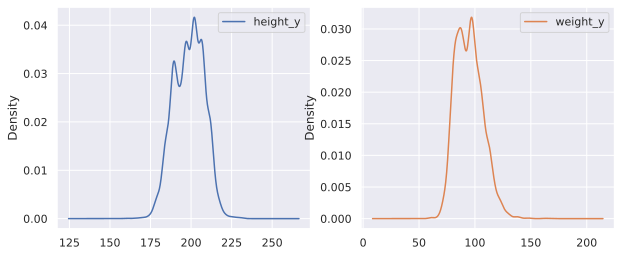

In [ ]:
# тепер можемо подивитися графіки розподілу зросту і ваги гравців
# бачимо, що в цілому розподіл близький до нормального, а значить спортсменів підбирають згідно з певними вимогами до кожної позиції

features = ["height_y", "weight_y"]
data_merged[features].plot(
    kind="density", subplots=True, layout=(1, 2), sharex=False, figsize=(10, 4)
);

**To understand the position requirements, let's build a new plot. We observe the three most popular positions and see that guards (G) mostly have a height around 190 cm, forwards (F) are mostly over 200 cm, and centers (C) are even close to 210 cm.**

<Axes: xlabel='position', ylabel='height_y'>

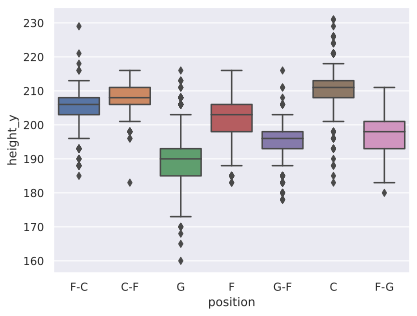

In [ ]:
# щоб розуміти вимоги до позицій, будуємо новий графік
# дивимось на 3 найпопулярніші позиції і бачимо, що
# захисники (G) у більшості мають зріст близько 190 см, форварди (F) - більше 200 см, а центрові (C) навіть близько 210 см

sns.boxplot(data=data_merged, y="height_y", x="position")

**Let's build the same graph but with players' weights. We see that guards (G) have the lightest weight around 82 kg (although there are outliers with weights from 100 to 120 kg), forwards (F) are around 100 kg, and centers (C) are the heaviest, over 100 kg (with many outliers reaching 140 kg and higher). From these two graphs, we can conclude that the guard (G) position has the smallest height and weight, while the center (C) position has the largest. Clearly, speed and agility are crucial for guards (G), while height and strength are important for centers (C) to facilitate easier scoring and blocking opponents. This is also evidenced by the large number of outliers for both positions (abnormal height and weight metrics).**

<Axes: xlabel='position', ylabel='weight_y'>

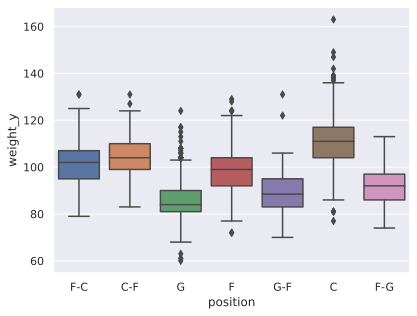

In [ ]:
# будуємо такий самий графік, але вже з вагою гравців.
# бачимо, що найменшу вагу мають захисники (G) - в районі 82 кг (хоча є і аутлеєри з вагою від 100 до 120 кг), форварди (F)- близько 100 кг
# і найважчі центрові (C) - більше 100 кг (причому у них же велика кількість аутлеєрів, 140 кг і вище).
# Тож з цих двох графіків можна зробити висновок, що позиція захисника (G) має найменші показники зросту та ваги, а центрового (C) - найбільші.
# Очевидно, що для захисника (G) важлива швидкість та спритність,
# а для центрового (C) - важка і висока статура, щоб легше закидати м'яч і блокувати противника.
# Про це свідчить також велика кількість аутлеєрів для обох позицій (аномальні показники зросту та ваги).

sns.boxplot(data=data_merged, y="weight_y", x="position")


**We can plot the heights of the top 5 tallest players. We see that in four of them, the height is around 230 cm.**

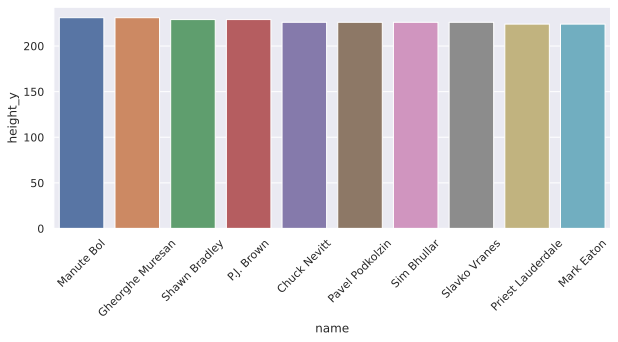

In [ ]:
# можна вивести в діаграму 5 найвищих гравців
# бачимо, що в чотирьох із них зріст близько 230 см

data_sort_height = data_merged.sort_values("height_y", ascending=False)
highest_players = data_sort_height.head(10)
plt.figure(figsize=(10, 4))
sns.barplot(x="name", y="height_y", data=highest_players)
plt.xticks(rotation=45)
plt.show()

**Now let's consider the last table. Here we see statistical metrics of players.**

In [ ]:
# тепер розглянемо останню таблицю
# бачимо тут статистичні показники гравців

seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,"1,950.00",Curly Armstrong,G-F,31.00,FTW,63.00,NaN,NaN,NaN,...,0.70,NaN,NaN,NaN,176.00,NaN,NaN,NaN,217.00,458.00
1,1,"1,950.00",Cliff Barker,SG,29.00,INO,49.00,NaN,NaN,NaN,...,0.71,NaN,NaN,NaN,109.00,NaN,NaN,NaN,99.00,279.00
2,2,"1,950.00",Leo Barnhorst,SF,25.00,CHS,67.00,NaN,NaN,NaN,...,0.70,NaN,NaN,NaN,140.00,NaN,NaN,NaN,192.00,438.00
3,3,"1,950.00",Ed Bartels,F,24.00,TOT,15.00,NaN,NaN,NaN,...,0.56,NaN,NaN,NaN,20.00,NaN,NaN,NaN,29.00,63.00
4,4,"1,950.00",Ed Bartels,F,24.00,DNN,13.00,NaN,NaN,NaN,...,0.55,NaN,NaN,NaN,20.00,NaN,NaN,NaN,27.00,59.00


**Looking at the column information, we see 2 columns that are completely empty.**

In [ ]:
# дивимося інформацію по колонках і бачимо 2 повністю "пусті"

seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

**Deleting the empty columns.**

In [ ]:
# видаляємо пусті колонки

seasons_stats = seasons_stats.drop(["blanl", "blank2"], axis=1)

**Review the columns with numerical metrics.**

In [ ]:
# робимо огляд колонок з числовими показниками

seasons_stats.describe()

,Unnamed: 0,Year,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,"24,691.00","24,624.00","24,616.00","24,624.00","18,233.00","24,138.00","24,101.00","24,538.00","18,839.00","24,525.00",...,"23,766.00","20,797.00","20,797.00","24,312.00","24,624.00","20,797.00","20,797.00","19,645.00","24,624.00","24,624.00"
mean,"12,345.00","1,992.59",26.66,50.84,23.59,"1,209.72",12.48,0.49,0.16,0.33,...,0.72,62.19,147.20,224.64,114.85,39.90,24.47,73.94,116.34,510.12
std,"7,127.82",17.43,3.84,26.50,28.63,941.15,6.04,0.09,0.19,0.22,...,0.14,67.32,145.92,228.19,135.86,38.71,36.94,67.71,84.79,492.92
min,0.00,"1,950.00",18.00,1.00,0.00,0.00,-90.60,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"6,172.50","1,981.00",24.00,27.00,0.00,340.00,9.80,0.46,0.01,0.21,...,0.66,12.00,33.00,51.00,19.00,9.00,3.00,18.00,39.00,106.00
50%,"12,345.00","1,996.00",26.00,58.00,8.00,"1,053.00",12.70,0.51,0.06,0.30,...,0.74,38.00,106.00,159.00,68.00,29.00,11.00,55.00,109.00,364.00
75%,"18,517.50","2,007.00",29.00,75.00,45.00,"1,971.00",15.60,0.54,0.29,0.40,...,0.81,91.00,212.00,322.00,160.00,60.00,29.00,112.00,182.00,778.00
max,"24,690.00","2,017.00",44.00,88.00,83.00,"3,882.00",129.10,1.14,1.00,6.00,...,1.00,587.00,"1,111.00","2,149.00","1,164.00",301.00,456.00,464.00,386.00,"4,029.00"


**Let's take a look at the heatmap to see the correlations between the metrics. We observe values close to 0, indicating that the data are not strongly related to each other. There are fewer values close to 1, indicating some degree of correlation between those metrics.**

<ipython-input-238-d63c1498e16e>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_seasons_stats = seasons_stats.corr()


<Axes: >

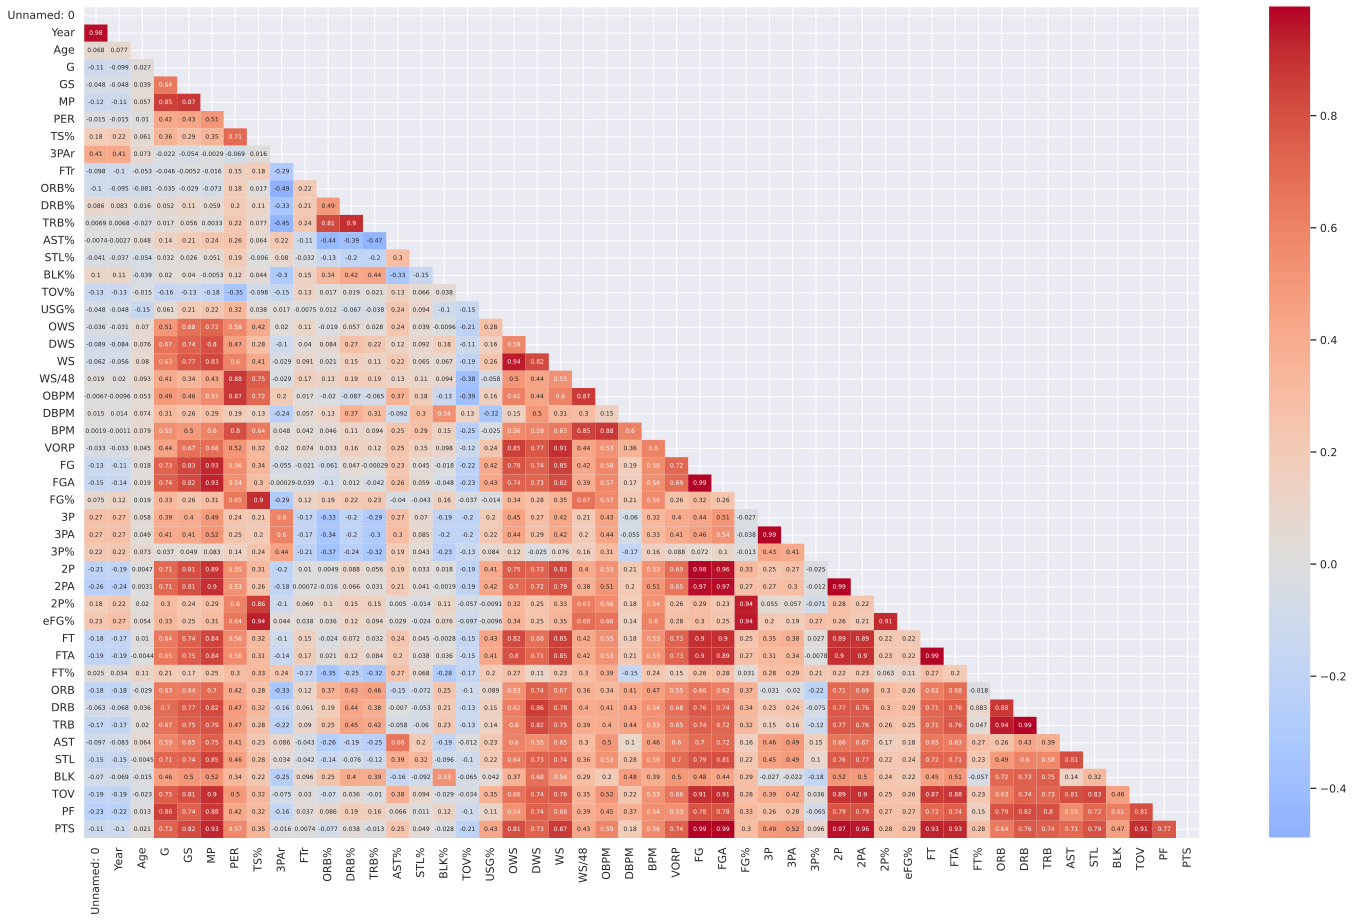

In [ ]:
# на тепловій мапі подивимося кореляціі між показниками
# бачимо значення близькі до 0, що означає, що дані не пов'язані між собою,
# в меншій кількості є значення близькі до 1, а значить мають зв'язок.

corr_seasons_stats = seasons_stats.corr()
plt.figure(figsize=(25, 15))
matrix = np.triu(corr_seasons_stats.corr())
sns.heatmap(corr_seasons_stats, cmap="coolwarm", annot=True, annot_kws={"fontsize":6}, center= 0, mask=matrix)


**Let's take a look at the players who played the most games per season. We see that Walt Bellamy is at the top with approximately 90 games played.**

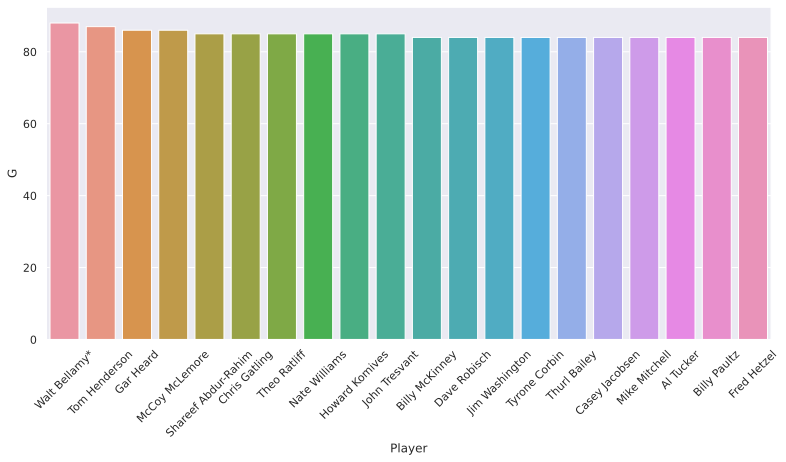

In [ ]:
# подивимось гравців, що зіграли більше ігор за сезон
# бачимо, що з показником у близько 90 ігор на першому місці Walt Bellamy

data_sort_games = seasons_stats.sort_values("G", ascending=False)
more_games = data_sort_games.head(20)
plt.figure(figsize=(13, 6))
sns.barplot(x="Player", y="G", data=more_games)
plt.xticks(rotation=45)

plt.show()

**Let's take a look at the top 10 teams that scored the most points.**







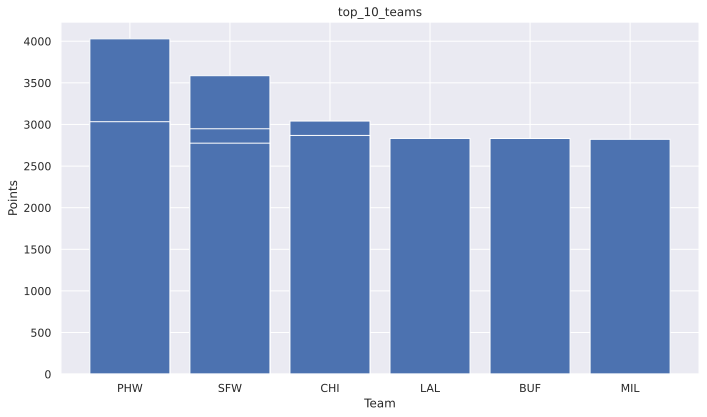

In [ ]:
# подивимось топ-10 команд, які набрали найбільшу кількість очок

top_10_teams = seasons_stats.sort_values(by="PTS", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_teams["Tm"], top_10_teams["PTS"])
plt.xlabel("Team")
plt.ylabel("Points")
plt.title("top_10_teams")
plt.tight_layout()

plt.show()

**The diagram displayed only 6 teams instead of 10, but it also shows some teams divided into parts: PHW with approximately 4000 and 3000 points, SFW with 3600, 2900, and 2800 points, and CHI with 3000 and 2800 points. Let's verify what our sorting reveals. From this data, we see that certain teams (PHW, SFW, CHI) scored a large number of points multiple times, as indicated by the diagram.**

In [ ]:
# діаграма показала тільки 6 команд, а не 10, але на ній також видно розділення деяких команд на долі:
# PHW - на рівні приблизно 4000 і 3000 очок, SFW - 3600, 2900 та 2800 і CHI - 3000 та 2800.
# тому перевіримо що покаже наше сортування
# з цих данних бачимо, що деякі команди (PHW, SFW, CHI) набирали велику кількість очок декілька разів, що і показала діаграма)

top_10_teams

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
1706,1706,"1,962.00",Wilt Chamberlain*,C,25.00,PHW,80.00,NaN,"3,882.00",31.70,...,0.61,NaN,NaN,"2,052.00",192.00,NaN,NaN,NaN,123.00,"4,029.00"
1827,1827,"1,963.00",Wilt Chamberlain*,C,26.00,SFW,80.00,NaN,"3,806.00",31.80,...,0.59,NaN,NaN,"1,946.00",275.00,NaN,NaN,NaN,136.00,"3,586.00"
8469,8469,"1,987.00",Michael Jordan*,SG,23.00,CHI,82.00,82.00,"3,281.00",29.80,...,0.86,166.00,264.00,430.00,377.00,236.00,125.00,272.00,237.00,"3,041.00"
1593,1593,"1,961.00",Wilt Chamberlain*,C,24.00,PHW,79.00,NaN,"3,773.00",27.80,...,0.50,NaN,NaN,"2,149.00",148.00,NaN,NaN,NaN,130.00,"3,033.00"
1962,1962,"1,964.00",Wilt Chamberlain*,C,27.00,SFW,80.00,NaN,"3,689.00",31.60,...,0.53,NaN,NaN,"1,787.00",403.00,NaN,NaN,NaN,182.00,"2,948.00"
8869,8869,"1,988.00",Michael Jordan*,SG,24.00,CHI,82.00,82.00,"3,311.00",31.70,...,0.84,139.00,310.00,449.00,485.00,259.00,131.00,252.00,270.00,"2,868.00"
17742,17742,"2,006.00",Kobe Bryant,SG,27.00,LAL,80.00,80.00,"3,277.00",28.00,...,0.85,71.00,354.00,425.00,360.00,147.00,30.00,250.00,233.00,"2,832.00"
4255,4255,"1,975.00",Bob McAdoo*,C,23.00,BUF,82.00,NaN,"3,539.00",25.80,...,0.81,307.00,848.00,"1,155.00",179.00,92.00,174.00,NaN,278.00,"2,831.00"
3316,3316,"1,972.00",Kareem Abdul-Jabbar*,C,24.00,MIL,81.00,NaN,"3,583.00",29.90,...,0.69,NaN,NaN,"1,346.00",370.00,NaN,NaN,NaN,235.00,"2,822.00"
2355,2355,"1,967.00",Rick Barry*,SF,22.00,SFW,78.00,NaN,"3,175.00",24.20,...,0.88,NaN,NaN,714.00,282.00,NaN,NaN,NaN,258.00,"2,775.00"


**Creating a similar diagram but with players who scored the most points.**

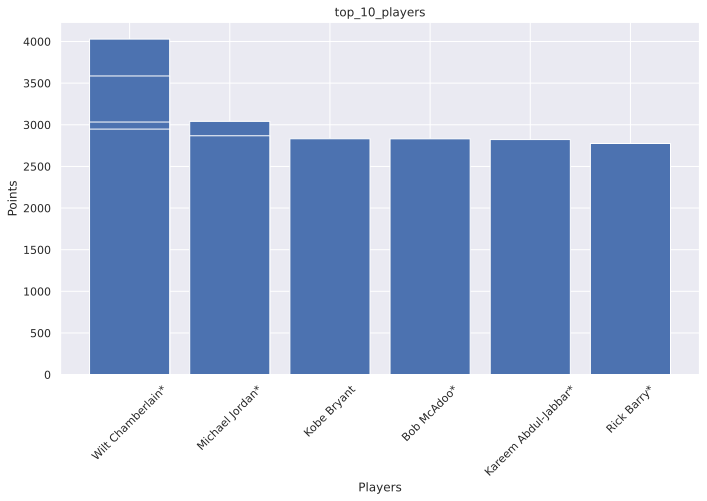

In [ ]:
# робимо аналогічну діаграму, але з гравцями, що набрали найбільшу кількість очок.
# така ж ситуація як і з командами: тільки 6 гравців, замість 10.
# бачимо, що найкращий гравець тут Wilt Chamberlain, але його показник розділений на діаграмі на 4 частини,
# а команда з найбільшою кількістю очок мала максимальне розділення на 3.
# Тож можна зробити висновок, що цей гравець грав за свою кар'єру мінімум в двох командах.
# Це ж підтверждує таблиця, розміщена вище: Wilt Chamberlain грав за команди PHW і SFW

top_10_players = seasons_stats.sort_values(by="PTS", ascending=False).head(10)

plt.figure(figsize=(10, 6))
plt.bar(top_10_players["Player"], top_10_players["PTS"])
plt.xlabel("Players")
plt.ylabel("Points")
plt.title("top_10_players")
plt.tight_layout()
plt.xticks(rotation=45)

plt.show()

**The situation is the same as with teams: only 6 players instead of 10 are shown. We see that the top player here is Wilt Chamberlain, but his score is divided into 4 parts on the diagram, whereas the team with the most points had a maximum division into 3 parts. Therefore, we can conclude that this player played for at least two teams during his career. This is confirmed by the table above: Wilt Chamberlain played for the teams PHW and SFW.**